# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.xlsx` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the dataframe in excel
df=pd.read_excel(r"D:\Users\guidi\anaconda3\esercizi\Week 15 - Final Assignment\Week 15 - Final Assignment\data\Software Professionals Salary.xlsx")
df.head(4)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000.0,3.0,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000.0,3.0,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000.0,3.0,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000.0,3.0,Bangalore,Full Time,Android


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  float64
 4   Salaries Reported  22770 non-null  float64
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [4]:
df.shape

(22770, 8)

<span style="color:yellow">The datafreme have 22770 row and 8 columns </span>

2. How many unique `Job Roles` are there in the dataset? 

In [5]:
# Select the columns Job Roles and find the unique values 
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [6]:
# Count the unique value in columns 'Job Roles
df['Job Roles'].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

<span style="color:yellow">There are 11 unique job title for Python job role </span>

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [7]:
df[df['Job Roles'] == 'Python']['Job Title'].nunique()


102

<span style="color:yellow">There are 102 job title for Python job role</span>

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [8]:
#Create a musk that cointain the Job Roles == Python and Job titole containing words 'Analyst'
estract = (df['Job Roles'] == 'Python') & (df['Job Title'].str.contains('Analyst'))
#create a new dataframe filtering the original for the newly created mask
df_python_analysts = df.loc[estract]
#ceate a new variable extracting the unique values in columns 'Company name'
num_companies = df_python_analysts['Company Name'].nunique()
name_companies=df_python_analysts['Company Name']

In [9]:
num_companies

3

In [10]:
name_companies

11352        Ocwen Financial
11371    TrioHats Consulting
11541                Infosys
Name: Company Name, dtype: object

<span style="color:yellow">There are 3 company that have Python job role with job title containing the substring 'Analyst' </span>

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [11]:
df_grouped = df.groupby("Company Name")["Salaries Reported"].count()
df_sorted = df_grouped.sort_values(ascending=False)
print(df_sorted.index[0])

Tata Consultancy Services


<span style="color:yellow"> The company with the highest numeber of salary is reported is Tata Consultancy Services </span>

6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [12]:
# Make a copy of the original dataframe
location_name=df.copy()
# filter the new one for company name == 'Tata Consultancy Services'
location_name = df[df['Company Name'] == 'Tata Consultancy Services']
# find the uninque values
location_name['Location'].unique()


array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Kerala',
       'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

<span style="color:yellow">the company is present in 9 locations</span>

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [13]:
# Make a requests on the end point (Open Access Endpoint)
call=requests.get('https://v6.exchangerate-api.com/v6/a63a5c91a7da3b0bfb9a5497/latest/USD')
# Check if the request was successful
call.status_code

200

In [14]:
# Convert the request in json and extract only the value of 'INR'
rate=call.json()['conversion_rates']['INR']
rate

82.8295

<span style="color:yellow">The rate is 82.8295</span>

In [15]:
# Create a new column 'Salary USD' which takes the values ​​in the salary column and divides it by the selected exchange rate, then rounds to have no decimals
df['Salary USD']=round(df['Salary']/rate,0)
df.head(4)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000.0,3.0,Bangalore,Full Time,Android,4829.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000.0,3.0,Bangalore,Full Time,Android,4829.0
2,4.0,Unacademy,Android Developer,1000000.0,3.0,Bangalore,Full Time,Android,12073.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000.0,3.0,Bangalore,Full Time,Android,3622.0


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [16]:
mean_salaries = df.groupby('Job Roles')['Salary USD'].mean()
# Select only the job roles == Python
mean_salaries['Python']

5867.7391763463565

<span style="color:yellow"> The avarege of salary in USD is 5867.74 </span>

9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [17]:
# Group by Company name and find the mean of Salary USD
avg_salaries = df.groupby('Company Name')['Salary USD'].mean()
# Find the Company with the max value 
avg_salaries.idxmax()

'Thapar University'

<span style="color:yellow"> The Company Name has the highest average Salary USD is 'Thapar University' </span>

10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [18]:
# Create two serie that cointain the avg of Salary and Reating grounp by Company name
salary_avg = df.groupby('Company Name')['Salary USD'].mean()
Rating_avg = df.groupby('Company Name')['Rating'].mean()

# Create new dataframe 
df_mean=pd.DataFrame({'Salary': salary_avg, 'Rating':Rating_avg})

In [19]:
df_mean.head()

,Salary,Rating
Company Name,,
10.0,8258.0,4.0
700.0,8403.0,3.9
1985.0,3767.0,3.3
2018.0,8548.0,3.8
17544.0,22939.0,3.9


Text(0, 0.5, 'Average Salary USD')

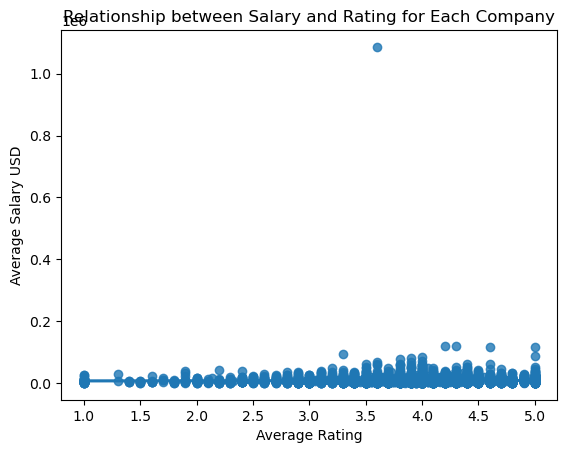

In [20]:
sns.regplot(data= df_mean, y='Salary', x='Rating')
plt.title('Relationship between Salary and Rating for Each Company')
plt.xlabel('Average Rating')
plt.ylabel('Average Salary USD')



<span style="color:yellow"> As we can see, on average, a higher rating means a higher salary</span>

In [21]:
# Order the dataframe by columns Salary 
df_mean.sort_values('Salary', ascending=False)

,Salary,Rating
Company Name,,
Thapar University,1086569.0,3.6
FFF Enterprises,118315.0,4.2
Digital Raju,118315.0,4.3
Gaana Lyrics Point.com,117108.0,5.0
GGH Heavy Industries,115901.0,4.6
...,...,...
Nasya Software Technologies,145.0,4.0
Webboombaa,145.0,4.3
Acmatics Technologies,145.0,3.5


<span style="color:yellow"> Thapar University gives a salary of 1.086.926 for a programmer rated 3.6</span>